## Polynomial Regression Model

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#### Load Data

In [18]:
df = pd.read_csv("../train.csv")
y = df["SalePrice"]
X = df.drop(columns=["SalePrice", "Id"])

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

#### Build Pipeline

In [19]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False))
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

model = Pipeline([
    ("preprocess", preprocessor),
    ("linreg", LinearRegression())
])

#### Grid Search

In [20]:
param_grid = {
    "preprocess__num__poly__degree": [1, 2, 3]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

print("\nRunning Grid Search... (this may take ~1–3 minutes)")
grid.fit(X, y)

best_degree = grid.best_params_["preprocess__num__poly__degree"]
print("\nBest Polynomial Degree:", best_degree)
print("Best CV MSE:", -grid.best_score_)


Running Grid Search... (this may take ~1–3 minutes)

Best Polynomial Degree: 1
Best CV MSE: 1197661597.4433892


#### Train and Evaluate the Model

In [21]:
best_model = grid.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

best_model.fit(X_train, y_train)

pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)


train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)
train_mae = mean_absolute_error(y_train, pred_train)
test_mae = mean_absolute_error(y_test, pred_test)

print("\n=== Model Performance ===")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
poly_r2 = r2_score(y_test, pred_test)
print("Polynomial Regression R²:", poly_r2)



=== Model Performance ===
Train MSE: 381425331.9864961
Test MSE: 868709192.8794286
Train MAE: 12677.049479694295
Test MAE: 18287.69862268414
Polynomial Regression R²: 0.8867441658393297


#### Visualization

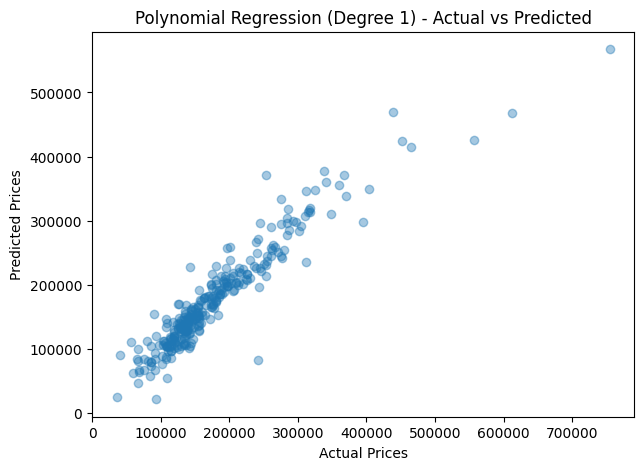

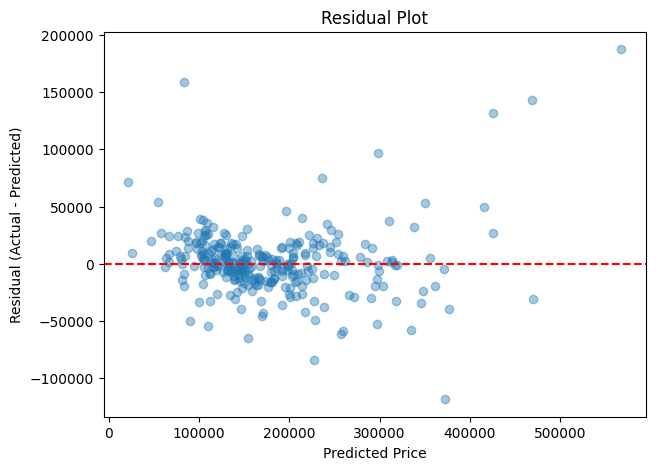

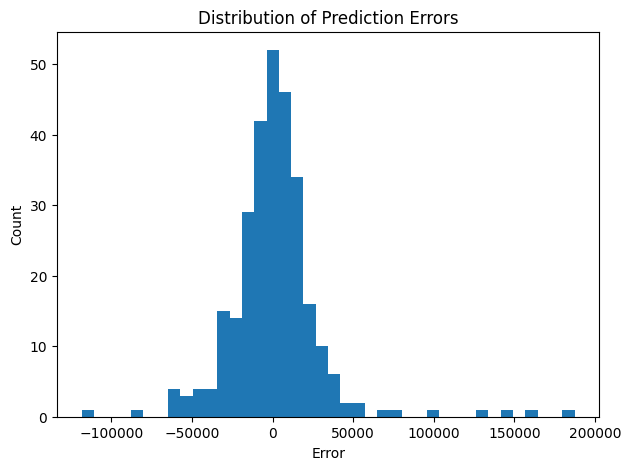

In [22]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred_test, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Polynomial Regression (Degree {best_degree}) - Actual vs Predicted")
plt.show()

residuals = y_test - pred_test
plt.figure(figsize=(7, 5))
plt.scatter(pred_test, residuals, alpha=0.4)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=40)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()

#### Summary

In [23]:
print(f"Best Polynomial Degree: {best_degree}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE:  {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE:  {test_mae:.2f}")
print("Polynomial Regression R²:", poly_r2)


Best Polynomial Degree: 1
Train MSE: 381425331.99
Test MSE:  868709192.88
Train MAE: 12677.05
Test MAE:  18287.70
Polynomial Regression R²: 0.8867441658393297
